In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
listings_summary = pd.read_csv("listings.csv")
print(listings_summary.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [33]:
listings_summary.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,NaN,North Hills,32.753993,-117.129705,Entire home/apt,295,2,149,2018-10-07,1.18,1,20
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,NaN,Mission Bay,32.784304,-117.252578,Entire home/apt,2050,3,0,NaN,NaN,2,328
2,8095,Sunset Cliffs Studio,270,Marin,NaN,Ocean Beach,32.735170,-117.243793,Entire home/apt,84,2,178,2015-11-02,1.56,1,0
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,NaN,North Hills,32.731884,-117.119180,Entire home/apt,69,3,338,2018-11-07,3.33,1,273
4,45429,OB cottage SD--view on waterway,197919,Melissa,NaN,Loma Portal,32.748768,-117.229371,Entire home/apt,160,2,6,2014-07-28,0.06,1,363


In [152]:
len(listings_summary.id.unique())

11922

Price distribution for San Diego 2018

count    11922.000000
mean       212.707851
std        306.991755
min          0.000000
25%         80.000000
50%        130.000000
75%        249.000000
max      10000.000000
Name: price, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe3a33429d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe3a31fb0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe3a3342670>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe3a31fb790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe3a31fbdf0>],
 'means': [<matplotlib.lines.Line2D at 0x7fe3a31fba90>]}

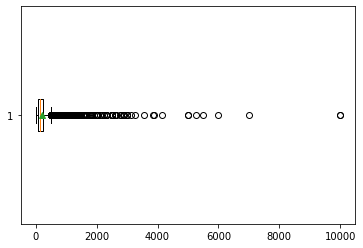

In [6]:
print(listings_summary.price.describe())
plt.boxplot(listings_summary.price,vert=False,showmeans=True)

Lets have a closer look at the most popular price range

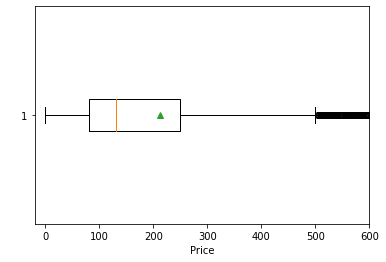

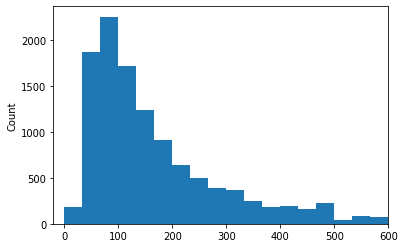

In [26]:
plt.boxplot(listings_summary.price,vert=False,showmeans=True)
plt.xlim(-20,600)
plt.xlabel("Price")
plt.show()
plt.hist(listings_summary.price,bins=300,)
plt.xlim(-20,600)
plt.ylabel("Count")
plt.show()


Lets have a closer look at the most expensive price ranges for houses

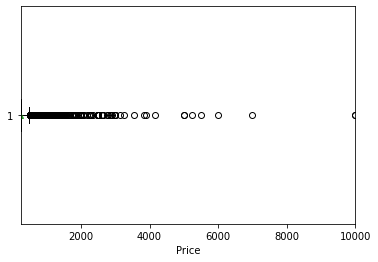

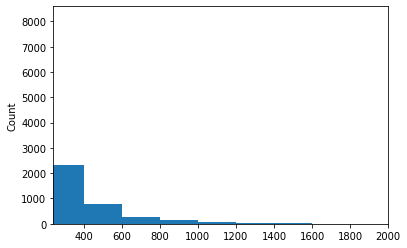

In [32]:
plt.boxplot(listings_summary.price,vert=False,showmeans=True)
plt.xlim(240,10000)
plt.xlabel("Price")
plt.show()
plt.hist(listings_summary.price,bins=50,)
plt.xlim(240,2000)
plt.ylabel("Count")
plt.show()


What is the average price grouped by location?

In [49]:
listings_summary.groupby(["neighbourhood"]).mean()["price"].sort_values(ascending=False)

neighbourhood
La Jolla                       471.515000
Torrey Pines                   441.947368
Wooded Area                    354.066667
Mission Bay                    336.569959
Del Mar Heights                320.987500
                                  ...    
Valencia Park                   58.000000
Sunbow                          57.700000
Yosemite Dr                     54.666667
Paseo Ranchoero                 52.500000
Amphitheater And Water Park     40.000000
Name: price, Length: 103, dtype: float64

Which of these hosts hold the most space in San Diego?

In [55]:
listings_summary[["host_id","host_name","calculated_host_listings_count"]].drop_duplicates().sort_values(by=["calculated_host_listings_count"],ascending=False)

,host_id,host_name,calculated_host_listings_count
5509,122055416,SeaBreeze,161
4265,88168913,710 Beach Rentals,133
5766,12243051,Sonder,96
5234,8534462,Nadia,76
2017,38690778,Bluewater Vacation Homes,61
...,...,...,...
1257,3820444,Luis,1
4912,104238303,Michael,1
1258,3252595,Daniel,1
4910,5105729,Nancy,1


In [80]:
listings_summary[["host_id","host_name","calculated_host_listings_count"]].drop_duplicates().sort_values(by=["calculated_host_listings_count"],ascending=False).head(65)

,host_id,host_name,calculated_host_listings_count
5509,122055416,SeaBreeze,161
4265,88168913,710 Beach Rentals,133
5766,12243051,Sonder,96
5234,8534462,Nadia,76
2017,38690778,Bluewater Vacation Homes,61
...,...,...,...
3319,50320252,Suzanne,12
1356,11692963,Sb,12
1405,5178760,Nico,12
1017,1188065,Josh,12


How many  holdings do airbnb hosts hold normaly across San Diego?

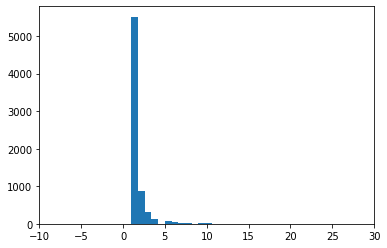

In [69]:
plt.hist(listings_summary[["host_id","host_name","calculated_host_listings_count"]].drop_duplicates()["calculated_host_listings_count"],bins=200)
plt.xlim(-10,30)
plt.show()

Do these hosts with multiple listings displa any trends in boarding and accomation market for airbnb San Diego?

In [94]:
listings_summary.groupby(["host_id","host_name","calculated_host_listings_count"]).mean()["price"].reset_index().sort_values(by=["calculated_host_listings_count"],ascending=False).head(50)

,host_id,host_name,calculated_host_listings_count,price
5676,122055416,SeaBreeze,161,589.037267
5074,88168913,710 Beach Rentals,133,584.586466
1486,12243051,Sonder,96,161.302083
1134,8534462,Nadia,76,184.078947
3332,38690778,Bluewater Vacation Homes,61,543.393443
3240,37353287,Nancys,58,366.844828
487,3017970,Surf Style,55,441.418182
5547,113421970,La Jolla,46,445.891304
4308,64443919,San Diego Sunset,45,392.044444
1251,9624153,Dixie & Jules,42,435.500000


Answer is NO

In [95]:
raw_listings =  pd.read_csv("raw/listings.csv")

In [96]:
raw_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [97]:
price_features = ['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights']

In [151]:
raw_listings[price_features]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights
0,House,Entire home/apt,6,2.0,3.0,4.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",NaN,295,NaN,NaN,0.0,85.0,4,5,2,30
1,Condominium,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",850.0,2050,NaN,NaN,500.0,150.0,1,0,3,365
2,Guesthouse,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,84,NaN,NaN,0.0,40.0,2,0,2,14
3,Tiny house,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Pool,Kitchen,""Pets live on this...",250.0,69,450.0,NaN,0.0,25.0,1,0,3,7
4,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",NaN,160,1060.0,NaN,0.0,35.0,2,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11917,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,70,NaN,NaN,0.0,NaN,1,0,21,365
11918,Condominium,Entire home/apt,7,2.0,2.0,3.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,150,NaN,NaN,250.0,50.0,4,10,1,1125
11919,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,32,NaN,NaN,150.0,75.0,1,6,1,30
11920,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,32,NaN,NaN,150.0,65.0,1,5,1,30


In [134]:
def price2int(price):
    try:
        return int(price.lstrip("$").rstrip('0').rstrip('.').replace(',',''))
    except:
        return price
raw_listings["price"] = raw_listings["price"].apply(price2int)
raw_listings["weekly_price"] = raw_listings["weekly_price"].apply(price2int)
raw_listings["monthly_price"]= raw_listings["monthly_price"].apply(price2int)
raw_listings["security_deposit"] = raw_listings["security_deposit"].apply(price2int)
raw_listings["cleaning_fee"] = raw_listings["cleaning_fee"].apply(price2int)
raw_listings["extra_people"] = raw_listings["extra_people"].apply(price2int)

In [147]:
raw_listings = raw_listings[raw_listings["price"]>0]

In [144]:
raw_listings["security_deposit"].fillna(0,inplace=True)

In [148]:
raw_listings["security_deposit_div_actual_price"]= (raw_listings["security_deposit"]/raw_listings["price"])*100

<ipython-input-148-ac6915696f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_listings["security_deposit_div_actual_price"]= (raw_listings["security_deposit"]/raw_listings["price"])*100


In [149]:
raw_listings["security_deposit_div_actual_price"].describe()

count    11920.000000
mean       156.871282
std        318.146100
min          0.000000
25%          0.000000
50%         83.333333
75%        200.803213
max       8285.714286
Name: security_deposit_div_actual_price, dtype: float64

In [150]:
raw_listings["security_deposit_div_actual_price"]

0          0.000000
1         24.390244
2          0.000000
3          0.000000
4          0.000000
            ...    
11917      0.000000
11918    166.666667
11919    468.750000
11920    468.750000
11921      0.000000
Name: security_deposit_div_actual_price, Length: 11920, dtype: float64

In [157]:
pd.DataFrame(100. *raw_listings["property_type"].value_counts() / len(raw_listings))

,property_type
House,34.890940
Apartment,27.953020
Condominium,14.010067
Townhouse,5.578859
Guesthouse,3.255034
Guest suite,3.204698
Bungalow,2.525168
Loft,1.971477
Cottage,1.937919
Serviced apartment,0.729866


<BarContainer object of 21 artists>

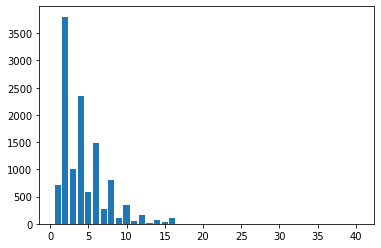

In [166]:
plt.bar(pd.DataFrame(raw_listings["accommodates"].value_counts()).index,pd.DataFrame(raw_listings["accommodates"].value_counts())["accommodates"],)